<a href="https://colab.research.google.com/github/thiphawan-j/ai-project/blob/main/MyProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
sns.set(font_scale=2.5)

# **Load Function**

In [4]:
from google.colab import files
src = list(files.upload().values())[0]
open('Replayers.py','wb').write(src)
import Replayers

Saving replayers.py to replayers.py


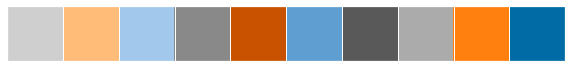

In [5]:

# using a color-blind friendly palette with 10 colors
color_blind_palette_10 = ['#cfcfcf', '#ffbc79', '#a2c8ec', '#898989', '#c85200',
                          '#5f9ed1', '#595959', '#ababab', '#ff800e', '#006ba4']

sns.palplot(color_blind_palette_10)

# **Load Data**

In [6]:
movie_df = pd.read_csv('/content/drive/MyDrive/AI/Project/data/raw/u.item', sep='|', header=None, encoding='latin1', index_col=False,
                   names=['movie_id',
                          'movie_title',
                          'release_date',
                          'video_release_date',
                          'imdb_url',
                          'unknown',
                          'action',
                          'adventure',
                          'animation',
                          'children',
                          'comedy',
                          'crime',
                          'documentary',
                          'drama',
                          'fantasy',
                          'film_noir',
                          'horror',
                          'musical',
                          'mystery'
                          'romance',
                          'sci_fi',
                          'thriller',
                          'war',
                          'western'])

movie_df.movie_id -= 1 # make this column zero-indexed

In [7]:
movie_df.head()

,movie_id,movie_title,release_date,video_release_date,imdb_url,unknown,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,film_noir,horror,musical,mysteryromance,sci_fi,thriller,war,western
0,0,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,3,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4,4,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0


# **Load the ratings data into a dataframe**

In [8]:
rating_df = pd.read_csv('/content/drive/MyDrive/AI/Project/data/raw/u.data', sep='\t', header=None, names=['user_id','movie_id','rating','timestamp'])
rating_df.user_id -= 1 # make this column zero-indexed
rating_df.movie_id -= 1 # make this column zero-indexed

In [9]:
rating_df.head()

,user_id,movie_id,rating,timestamp
0,195,241,3,881250949
1,185,301,3,891717742
2,21,376,1,878887116
3,243,50,2,880606923
4,165,345,1,886397596


# **Focus on the 10 movies with the most ratings**

In [10]:
movie_counts = rating_df.groupby('movie_id')['rating'].count().sort_values(ascending=False)

In [11]:
n_movies = 10
top_n_movies = rating_df.query('movie_id in {}'.format((movie_counts[:n_movies].index.values.tolist())))

In [12]:
# add the movie title for ease of access when plotting
# remove the timestamp column because we don't need it
top_n_movies = top_n_movies.merge(movie_df[['movie_id','movie_title']], on='movie_id', how='left') \
                           .drop(columns=['timestamp'])

In [13]:
#remove the year from the title
top_n_movies.movie_title = top_n_movies.movie_title.str.replace('\s+\(.+\)', '').str.strip()

In [14]:
top_n_movies.head()

,user_id,movie_id,rating,movie_title
0,307,0,4,Toy Story
1,250,99,4,Fargo
2,24,180,5,Return of the Jedi
3,19,287,1,Scream
4,31,293,3,Liar Liar


In [15]:
# save the output for use in other notebooks
top_n_movies.to_csv('/content/drive/MyDrive/AI/Project/data/top-n-movies_user-ratings.csv')

In [16]:
top_n_movies.movie_title.unique().tolist()

['Toy Story',
 'Fargo',
 'Return of the Jedi',
 'Scream',
 'Liar Liar',
 'Contact',
 'English Patient, The',
 'Star Wars',
 'Independence Day',
 'Air Force One']

In [17]:
color_map = dict(zip(top_n_movies.movie_title.sort_values().unique().tolist(), color_blind_palette_10))
color_map

{'Air Force One': '#cfcfcf',
 'Contact': '#ffbc79',
 'English Patient, The': '#a2c8ec',
 'Fargo': '#898989',
 'Independence Day': '#c85200',
 'Liar Liar': '#5f9ed1',
 'Return of the Jedi': '#595959',
 'Scream': '#ababab',
 'Star Wars': '#ff800e',
 'Toy Story': '#006ba4'}

In [18]:
rating_counts_by_movie = top_n_movies.groupby(['movie_id','movie_title','rating'], as_index=False).size().value_counts().to_frame('count').reset_index()


rating_counts_by_movie =pd.DataFrame({'count' : top_n_movies.groupby( [ "movie_id", "movie_title","rating"] ).size()}).reset_index()

In [19]:
rating_counts_by_movie.head()

,movie_id,movie_title,rating,count
0,0,Toy Story,1,8
1,0,Toy Story,2,27
2,0,Toy Story,3,96
3,0,Toy Story,4,202
4,0,Toy Story,5,119


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


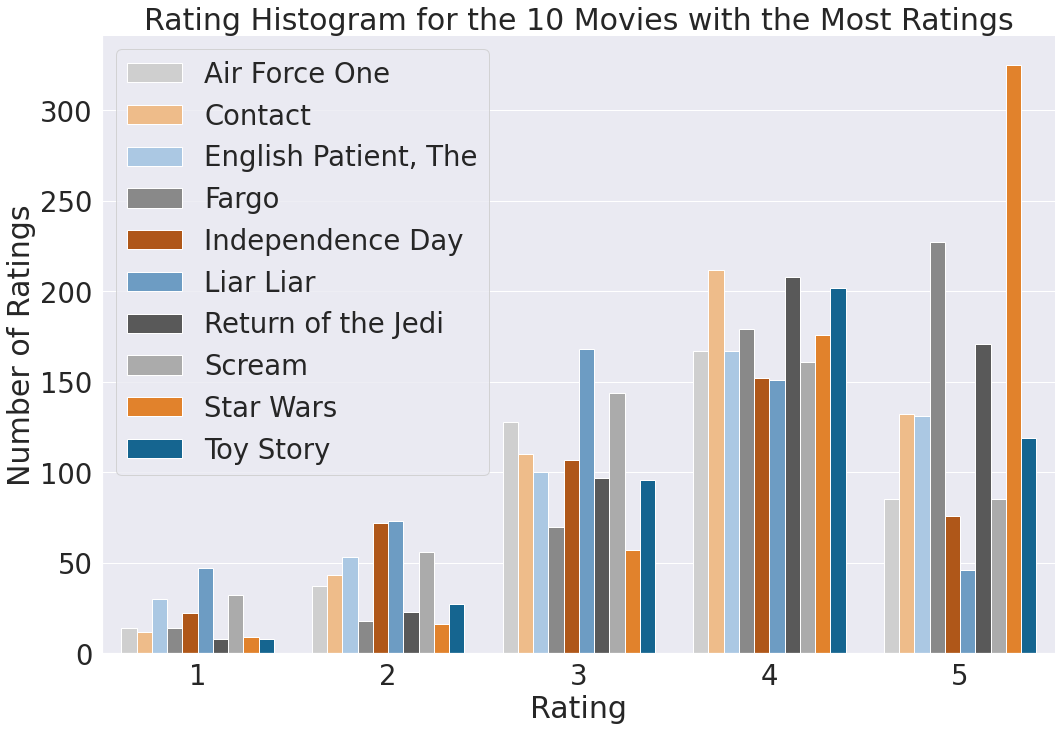

In [20]:
sns.set_palette(color_blind_palette_10)

rating_v_count_ax = sns.factorplot(data=rating_counts_by_movie, x='rating', y='count',hue='movie_title', hue_order=color_map.keys(), size=10, aspect=1.5, kind='bar', legend=False)

plt.title('Rating Histogram for the 10 Movies with the Most Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')

plt.legend(title='')

plt.show()

In [21]:
rating_v_count_ax.savefig('/content/drive/MyDrive/AI/Project/output/images/rating_distributions.png', transparent=False)

# **Transform the ratings from a discrete range into a binary "like" or "dislike"**

In [22]:
# movie ratings above this threshold will be counted as a "like"
reward_threshold = 4

In [23]:
rating_counts_by_movie.eval('liked = rating > @reward_threshold') \
                      .groupby(['movie_title','liked']) \
                      .sum().head()

movie_id  rating  count
movie_title          liked                         
Air Force One        False      1196      10    346
                     True        299       5     85
Contact              False      1028      10    377
                     True        257       5    132
English Patient, The False      1140      10    350

In [24]:
rating_counts_by_movie.eval('liked = rating > @reward_threshold') \
                      .groupby(['movie_title','liked'], as_index=False) \
                      .sum().head()

,movie_title,liked,movie_id,rating,count
0,Air Force One,False,1196,10,346
1,Air Force One,True,299,5,85
2,Contact,False,1028,10,377
3,Contact,True,257,5,132
4,"English Patient, The",False,1140,10,350


In [25]:
total_reward_counts = rating_counts_by_movie.eval('liked = rating > @reward_threshold') \
    .groupby(['movie_id','movie_title','liked'])['count'] \
    .sum() \
    .unstack('liked') \
    .reset_index() \
    .rename(columns={False:'disliked', True:'liked'}) \
    .eval('total = disliked + liked') \
    .eval('like_pct = 100 * liked / total')

In [26]:
total_reward_counts.sort_values('like_pct', ascending=False, inplace=True)
total_reward_counts.head(10)

liked,movie_id,movie_title,disliked,liked,total,like_pct
1,49,Star Wars,258,325,583,55.746141
2,99,Fargo,281,227,508,44.685039
4,180,Return of the Jedi,336,171,507,33.727811
6,285,"English Patient, The",350,131,481,27.234927
0,0,Toy Story,333,119,452,26.327434
5,257,Contact,377,132,509,25.933202
9,299,Air Force One,346,85,431,19.721578
7,287,Scream,393,85,478,17.782427
3,120,Independence Day,353,76,429,17.715618
8,293,Liar Liar,439,46,485,9.484536


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


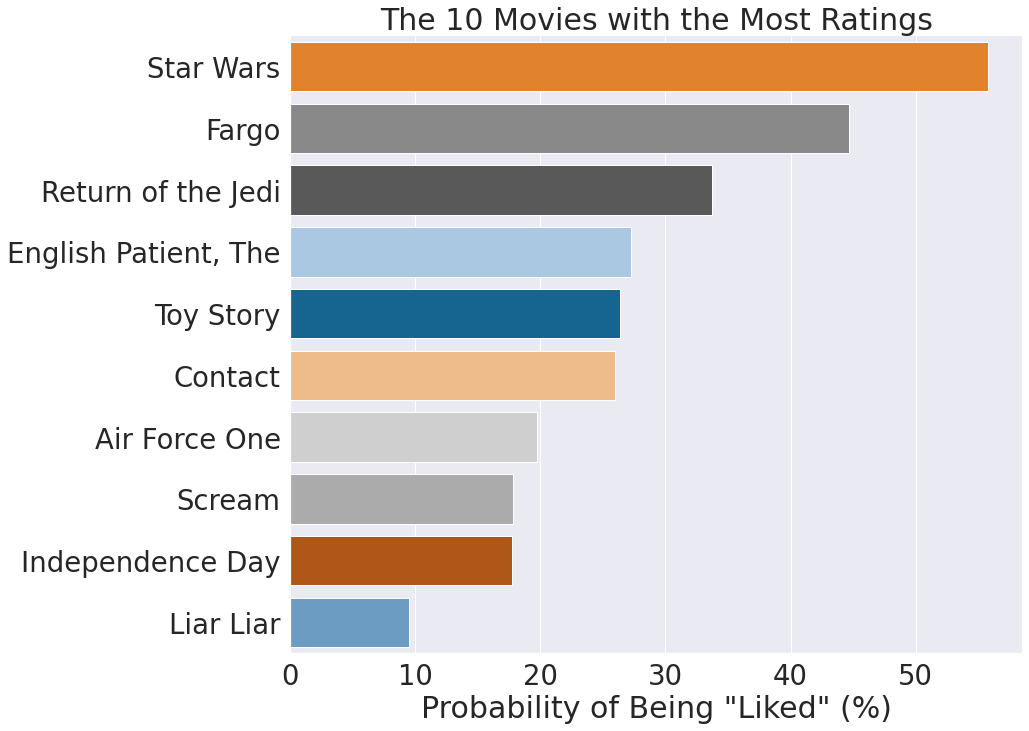

In [27]:
like_probability_ax = sns.factorplot(size=10, aspect=1.5, x='like_pct', y='movie_title', kind='bar',
                                     palette=total_reward_counts['movie_title'].apply(lambda x: color_map[x]),
                                     data=total_reward_counts)

plt.title('The 10 Movies with the Most Ratings')
like_probability_ax.set_axis_labels('Probability of Being "Liked" (%)','')

plt.show()


In [28]:
like_probability_ax.savefig('/content/drive/MyDrive/AI/Project/output/images/like_probabilities.png', transparent=False)

In [29]:
from Replayers import ABTestReplayer, EpsilonGreedyReplayer, ThompsonSamplingReplayer

# **Load historical data**

In [30]:
rating_df = pd.read_csv('/content/drive/MyDrive/AI/Project/data/top-n-movies_user-ratings.csv').drop(columns='Unnamed: 0')
rating_df.head()

,user_id,movie_id,rating,movie_title
0,307,0,4,Toy Story
1,250,99,4,Fargo
2,24,180,5,Return of the Jedi
3,19,287,1,Scream
4,31,293,3,Liar Liar


# **Translate ratings into a binary reward value**

In [31]:
reward_threshold = 4
rating_df['reward'] = rating_df.eval('rating > @reward_threshold').astype(int)
rating_df.head()


,user_id,movie_id,rating,movie_title,reward
0,307,0,4,Toy Story,0
1,250,99,4,Fargo,0
2,24,180,5,Return of the Jedi,1
3,19,287,1,Scream,0
4,31,293,3,Liar Liar,0


# **Set the parameters for the simulations**

In [32]:
n_visits = 20000
n_iterations = 20

reward_history = rating_df
item_col_name = 'movie_id'
visitor_col_name = 'user_id'
reward_col_name = 'reward'

# **A/B Test Simulations**

**Test period = 1,000 visits**

In [33]:
n_test_visits = 1000
ab_1k_results = ABTestReplayer(n_visits, n_test_visits, reward_history,
                               item_col_name, visitor_col_name, reward_col_name,
                               n_iterations=n_iterations).replay()

100%|██████████| 20/20 [27:41<00:00, 83.07s/it]


In [34]:
ab_1k_results_df = pd.DataFrame(ab_1k_results)
ab_1k_results_df.head()

,iteration,visit,item_id,visitor_id,reward,total_reward,fraction_relevant
0,0,0,120,12,1,1,1.000000
1,0,1,299,783,0,1,0.500000
2,0,2,49,649,1,2,0.666667
3,0,3,49,837,1,3,0.750000
4,0,4,49,483,1,4,0.800000


In [35]:
ab_1k_results_df.to_csv('/content/drive/MyDrive/AI/Project/output/ab_test_1k.csv')

**Test period = 5,000 visits**

In [36]:
n_test_visits = 5000
ab_5k_results = ABTestReplayer(n_visits, n_test_visits, reward_history,
                               item_col_name, visitor_col_name, reward_col_name,
                               n_iterations=n_iterations).replay()


100%|██████████| 20/20 [28:11<00:00, 84.58s/it]


In [37]:
ab_5k_results_df = pd.DataFrame(ab_5k_results)
ab_5k_results_df.head()

,iteration,visit,item_id,visitor_id,reward,total_reward,fraction_relevant
0,0,0,120,12,1,1,1.000000
1,0,1,299,783,0,1,0.500000
2,0,2,49,649,1,2,0.666667
3,0,3,49,837,1,3,0.750000
4,0,4,49,483,1,4,0.800000


In [38]:
ab_5k_results_df.to_csv('/content/drive/MyDrive/AI/Project/output/ab_test_5k.csv')


# **$\epsilon$-Greedy Simulations**

**$\epsilon$ = 0.05**

In [39]:
epsilon = 0.05
epsilon_05_results = EpsilonGreedyReplayer(epsilon, n_visits, reward_history,
                                           item_col_name, visitor_col_name, reward_col_name,
                                           n_iterations=n_iterations).replay()

100%|██████████| 20/20 [26:55<00:00, 80.79s/it]


In [40]:
epsilon_05_results_df = pd.DataFrame(epsilon_05_results)
epsilon_05_results_df.head()

,iteration,visit,item_id,visitor_id,reward,total_reward,fraction_relevant
0,0,0,0,12,0,0,0.0
1,0,1,257,58,0,0,0.0
2,0,2,0,222,0,0,0.0
3,0,3,0,830,0,0,0.0
4,0,4,0,313,1,1,0.2


In [41]:
epsilon_05_results_df.to_csv('/content/drive/MyDrive/AI/Project/output/epsilon_greedy_05.csv')


**$\epsilon$ = 0.10**

In [42]:
epsilon = 0.10
epsilon_10_results = EpsilonGreedyReplayer(epsilon, n_visits, reward_history,
                                           item_col_name, visitor_col_name, reward_col_name,
                                           n_iterations=n_iterations).replay()

100%|██████████| 20/20 [27:10<00:00, 81.53s/it]


In [43]:
epsilon_10_results_df = pd.DataFrame(epsilon_10_results)
epsilon_10_results_df.head()

,iteration,visit,item_id,visitor_id,reward,total_reward,fraction_relevant
0,0,0,0,12,0,0,0.0
1,0,1,257,58,0,0,0.0
2,0,2,0,222,0,0,0.0
3,0,3,0,830,0,0,0.0
4,0,4,0,313,1,1,0.2


In [44]:
epsilon_10_results_df.to_csv('/content/drive/MyDrive/AI/Project/output/epsilon_greedy_10.csv')


# **Thompson Sampling Simulations**

In [45]:
thompson_results = ThompsonSamplingReplayer(n_visits, reward_history,
                                            item_col_name, visitor_col_name, reward_col_name,
                                            n_iterations=n_iterations).replay()

100%|██████████| 20/20 [27:11<00:00, 81.56s/it]


In [46]:
thompson_results_df = pd.DataFrame(thompson_results)
thompson_results_df.head()

,iteration,visit,item_id,visitor_id,reward,total_reward,fraction_relevant
0,0,0,299,12,0,0,0.000000
1,0,1,49,333,1,1,0.500000
2,0,2,49,693,1,2,0.666667
3,0,3,49,479,0,2,0.500000
4,0,4,120,525,0,2,0.400000


In [47]:
thompson_results_df.to_csv('/content/drive/MyDrive/AI/Project/output/thompson_sampling.csv')


#**Compare the results**

# **Average the results across all runs**

In [48]:
ab_1k_avg_results_df = ab_1k_results_df.groupby('visit', as_index=False).mean()

ab_5k_avg_results_df = ab_5k_results_df.groupby('visit', as_index=False).mean()

epsilon_05_avg_results_df = epsilon_05_results_df.groupby('visit', as_index=False).mean()

epsilon_10_avg_results_df = epsilon_10_results_df.groupby('visit', as_index=False).mean()

thompson_avg_results_df = thompson_results_df.groupby('visit', as_index=False).mean()

# **Plot the output**

In [49]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [50]:
sns.set(font_scale=2.5)


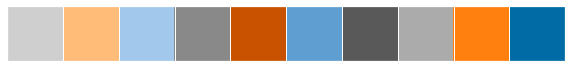

In [51]:
# using a color-blind friendly palette with 10 colors
color_blind_palette_10 = ['#cfcfcf', '#ffbc79', '#a2c8ec', '#898989', '#c85200',
                          '#5f9ed1', '#595959', '#ababab', '#ff800e', '#006ba4']

sns.palplot(color_blind_palette_10)


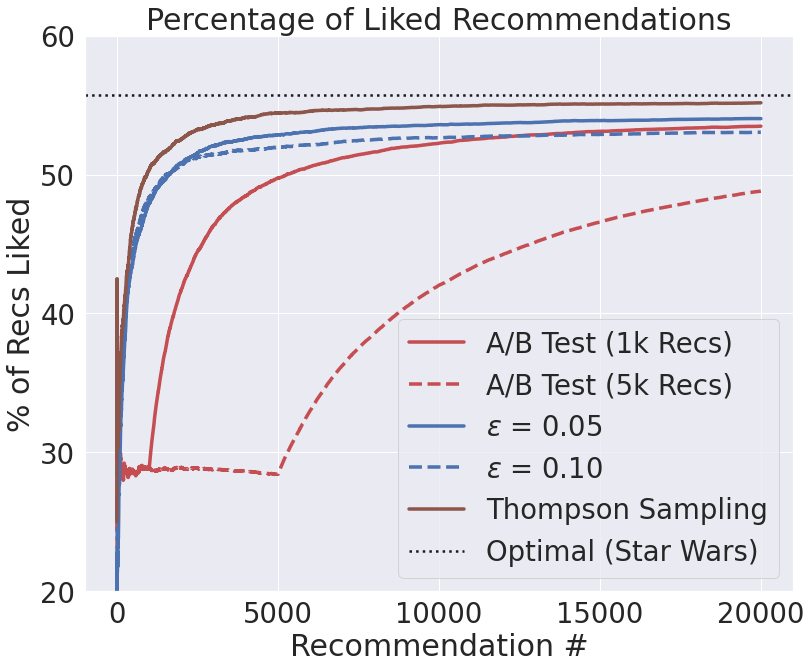

In [52]:
fig, ax = plt.subplots(figsize=(12,10))

for (avg_results_df, style) in [(ab_1k_avg_results_df, 'r-'),
                                (ab_5k_avg_results_df, 'r--'),
                                (epsilon_05_avg_results_df, 'b-'),
                                (epsilon_10_avg_results_df, 'b--'),
                                (thompson_avg_results_df, 'tab:brown')]:
    
    ax.plot(avg_results_df.visit, avg_results_df.fraction_relevant, style, linewidth=3.5)

# add a line for the optimal value -- 0.5575 for Star Wars (from exploration noteboook)
ax.axhline(y=0.5575, color='k', linestyle=':', linewidth=2.5)

ax.set_title('Percentage of Liked Recommendations')
ax.set_xlabel('Recommendation #')
ax.set_ylabel('% of Recs Liked')

ax.set_xticks(range(0,22000,5000))
ax.set_ylim(0.2, 0.6)
ax.set_yticks(np.arange(0.2, 0.7, 0.1))

# rescale the y-axis tick labels to show them as a percentage
ax.set_yticklabels((ax.get_yticks()*100).astype(int))

ax.legend(['A/B Test (1k Recs)',
           'A/B Test (5k Recs)',
           '$\epsilon$ = 0.05',
           '$\epsilon$ = 0.10',
           'Thompson Sampling',
           'Optimal (Star Wars)'
          ],
          loc='lower right'
         )

plt.tight_layout()
plt.show()

# **Result**

In [53]:
sns.set(font_scale=2.5)

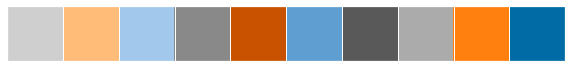

In [54]:
# using a color-blind friendly palette with 10 colors
color_blind_palette_10 = ['#cfcfcf', '#ffbc79', '#a2c8ec', '#898989', '#c85200',
                          '#5f9ed1', '#595959', '#ababab', '#ff800e', '#006ba4']

sns.palplot(color_blind_palette_10)

# **Movie info**

In [55]:
top_n_movie_ratings = pd.read_csv('/content/drive/MyDrive/AI/Project/data/top-n-movies_user-ratings.csv').drop(columns='Unnamed: 0')

In [56]:
top_n_movie_ratings.head()

,user_id,movie_id,rating,movie_title
0,307,0,4,Toy Story
1,250,99,4,Fargo
2,24,180,5,Return of the Jedi
3,19,287,1,Scream
4,31,293,3,Liar Liar


In [57]:
movie_titles = top_n_movie_ratings.groupby(['movie_id','movie_title']).size().to_frame() \
                                    .reset_index('movie_title').movie_title \
                                    .to_dict()
movie_titles

{0: 'Toy Story',
 49: 'Star Wars',
 99: 'Fargo',
 120: 'Independence Day',
 180: 'Return of the Jedi',
 257: 'Contact',
 285: 'English Patient, The',
 287: 'Scream',
 293: 'Liar Liar',
 299: 'Air Force One'}

In [58]:
color_map = dict(zip(top_n_movie_ratings.movie_title.sort_values().unique().tolist(), color_blind_palette_10))
color_map

{'Air Force One': '#cfcfcf',
 'Contact': '#ffbc79',
 'English Patient, The': '#a2c8ec',
 'Fargo': '#898989',
 'Independence Day': '#c85200',
 'Liar Liar': '#5f9ed1',
 'Return of the Jedi': '#595959',
 'Scream': '#ababab',
 'Star Wars': '#ff800e',
 'Toy Story': '#006ba4'}

# **Load the results from the simulations¶**

# **A/B Test Output**

In [59]:
ab_test_1k = pd.read_csv('/content/drive/MyDrive/AI/Project/output/ab_test_1k.csv').drop(columns='Unnamed: 0')

In [60]:
ab_test_1k.head()

,iteration,visit,item_id,visitor_id,reward,total_reward,fraction_relevant
0,0,0,120,12,1,1,1.000000
1,0,1,299,783,0,1,0.500000
2,0,2,49,649,1,2,0.666667
3,0,3,49,837,1,3,0.750000
4,0,4,49,483,1,4,0.800000


In [61]:
ab_test_5k = pd.read_csv('/content/drive/MyDrive/AI/Project/output/ab_test_5k.csv').drop(columns='Unnamed: 0')

In [62]:
ab_test_5k.head()

,iteration,visit,item_id,visitor_id,reward,total_reward,fraction_relevant
0,0,0,120,12,1,1,1.000000
1,0,1,299,783,0,1,0.500000
2,0,2,49,649,1,2,0.666667
3,0,3,49,837,1,3,0.750000
4,0,4,49,483,1,4,0.800000


# **$\epsilon$-Greedy Output**

In [63]:
eps_greedy_05 = pd.read_csv('/content/drive/MyDrive/AI/Project/output/epsilon_greedy_05.csv').drop(columns='Unnamed: 0')

In [64]:
eps_greedy_05.head()

,iteration,visit,item_id,visitor_id,reward,total_reward,fraction_relevant
0,0,0,0,12,0,0,0.0
1,0,1,257,58,0,0,0.0
2,0,2,0,222,0,0,0.0
3,0,3,0,830,0,0,0.0
4,0,4,0,313,1,1,0.2


In [65]:
eps_greedy_10 = pd.read_csv('/content/drive/MyDrive/AI/Project/output/epsilon_greedy_10.csv').drop(columns='Unnamed: 0')

In [66]:
eps_greedy_10.head()

,iteration,visit,item_id,visitor_id,reward,total_reward,fraction_relevant
0,0,0,0,12,0,0,0.0
1,0,1,257,58,0,0,0.0
2,0,2,0,222,0,0,0.0
3,0,3,0,830,0,0,0.0
4,0,4,0,313,1,1,0.2


# **Thompson Sampling Output**

In [67]:
thompson = pd.read_csv('/content/drive/MyDrive/AI/Project/output/thompson_sampling.csv').drop(columns='Unnamed: 0')

In [68]:
thompson.head()

,iteration,visit,item_id,visitor_id,reward,total_reward,fraction_relevant
0,0,0,299,12,0,0,0.000000
1,0,1,49,333,1,1,0.500000
2,0,2,49,693,1,2,0.666667
3,0,3,49,479,0,2,0.500000
4,0,4,120,525,0,2,0.400000


In [69]:
# create a dataframe with running totals of how many times each recommendation was taken
thompson_running_ttl = thompson.query('iteration == 0') \
                                .eval('selected = 1') \
                                .pivot(index='visit', columns='item_id', values='selected') \
                                .fillna(0) \
                                .cumsum(axis=0) \
                                .reset_index() \
                                .rename(columns=movie_titles)

In [70]:
# scale the value by the visit number to get turn the running total into a percentage
thompson_running_ttl.iloc[:,1:] = thompson_running_ttl.iloc[:,1:].div((thompson_running_ttl.visit + 1)/100, axis=0)

In [71]:
thompson_running_ttl.head()

item_id,visit,Toy Story,Star Wars,Fargo,Independence Day,Return of the Jedi,Contact,"English Patient, The",Scream,Liar Liar,Air Force One
0,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.000000
1,1,0.0,50.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.000000
2,2,0.0,66.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.333333
3,3,0.0,75.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.000000
4,4,0.0,60.000000,0.0,20.0,0.0,0.0,0.0,0.0,0.0,20.000000


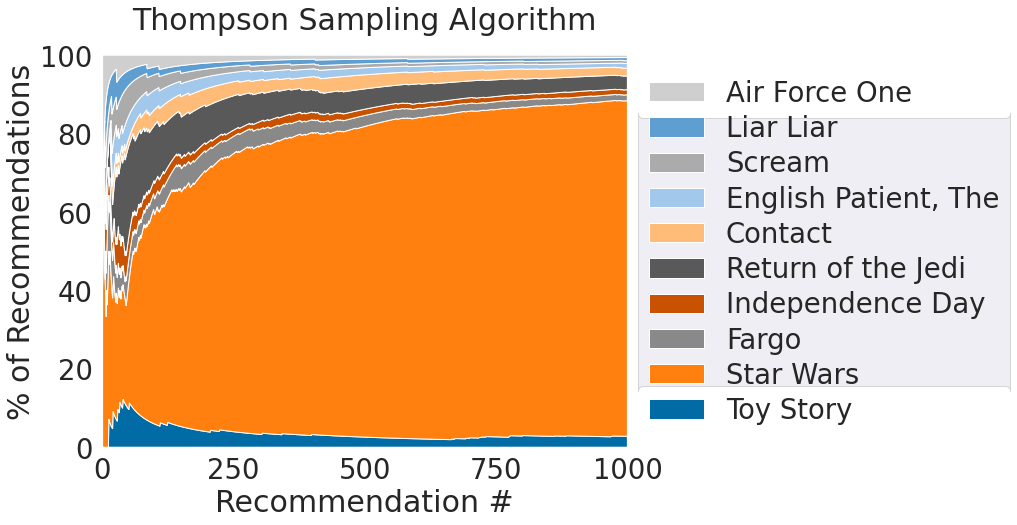

In [72]:
sns.set_palette(color_blind_palette_10)

fig, ax = plt.subplots(figsize=(10,8))

ax.stackplot(thompson_running_ttl.visit,
             thompson_running_ttl.iloc[:,1:11].T,
             labels=thompson_running_ttl.iloc[:,1:11].columns.values.tolist(),
             colors=[color_map[x] for x in thompson_running_ttl.iloc[:,1:].columns.values]
            )

ax.set_xlim(0,1000)
ax.set_xticks(range(0, 1100, 250))

ax.set_title('Thompson Sampling Algorithm')
ax.set_xlabel('Recommendation #')
ax.set_ylabel('% of Recommendations')

lgd = plt.legend(bbox_to_anchor=(1.02, 0.15), loc=2, borderaxespad=0., labelspacing=-2.3)

ax.set_facecolor('w')

plt.tight_layout()
plt.show()

In [73]:
fig.savefig('/content/drive/MyDrive/AI/Project/output/images/bandit_results.png', transparent=False, bbox_extra_artists=(lgd,), bbox_inches='tight')

# **Group the data to average over the runs**

# **A/B Test**

In [74]:
ab_test_1k_avg = ab_test_1k.groupby('visit', as_index=False).mean()

In [75]:
ab_test_1k_avg.head()

,visit,iteration,item_id,visitor_id,reward,total_reward,fraction_relevant
0,0,9.5,156.1,431.85,0.40,0.40,0.400000
1,1,9.5,172.4,470.55,0.25,0.65,0.325000
2,2,9.5,154.9,512.85,0.35,1.00,0.333333
3,3,9.5,181.4,424.95,0.35,1.35,0.337500
4,4,9.5,200.4,559.00,0.25,1.60,0.320000


In [76]:
ab_test_5k_avg = ab_test_5k.groupby(['visit'], as_index=False).mean()

In [77]:
ab_test_5k_avg.head()

,visit,iteration,item_id,visitor_id,reward,total_reward,fraction_relevant
0,0,9.5,181.55,534.90,0.15,0.15,0.150
1,1,9.5,190.00,445.60,0.30,0.45,0.225
2,2,9.5,127.45,527.70,0.30,0.75,0.250
3,3,9.5,131.30,459.80,0.55,1.30,0.325
4,4,9.5,167.40,489.85,0.35,1.65,0.330


# **$\epsilon$-Greedy**

In [78]:
eps_greedy_05_avg = eps_greedy_05.groupby(['visit'], as_index=False).mean()

In [79]:
eps_greedy_05_avg.head()

,visit,iteration,item_id,visitor_id,reward,total_reward,fraction_relevant
0,0,9.5,20.95,555.05,0.20,0.20,0.200000
1,1,9.5,12.85,576.85,0.00,0.20,0.100000
2,2,9.5,0.00,417.70,0.35,0.55,0.183333
3,3,9.5,16.80,466.30,0.25,0.80,0.200000
4,4,9.5,0.00,506.50,0.30,1.10,0.220000


In [80]:
eps_greedy_10_avg = eps_greedy_10.groupby(['visit'], as_index=False).mean()

In [81]:
eps_greedy_10_avg.head()

,visit,iteration,item_id,visitor_id,reward,total_reward,fraction_relevant
0,0,9.5,37.70,464.60,0.20,0.20,0.200000
1,1,9.5,47.15,363.45,0.15,0.35,0.175000
2,2,9.5,63.05,362.55,0.30,0.65,0.216667
3,3,9.5,48.10,558.55,0.15,0.80,0.200000
4,4,9.5,33.55,363.95,0.35,1.15,0.230000


# **Thompson Sampling**

In [82]:
thompson_avg = thompson.groupby(['visit'], as_index=False).mean()

In [83]:
thompson_avg.head()

,visit,iteration,item_id,visitor_id,reward,total_reward,fraction_relevant
0,0,9.5,212.85,402.80,0.25,0.25,0.250000
1,1,9.5,198.55,410.75,0.60,0.85,0.425000
2,2,9.5,199.05,489.05,0.40,1.25,0.416667
3,3,9.5,147.90,335.60,0.30,1.55,0.387500
4,4,9.5,141.15,443.55,0.15,1.70,0.340000


# **summarize the results**

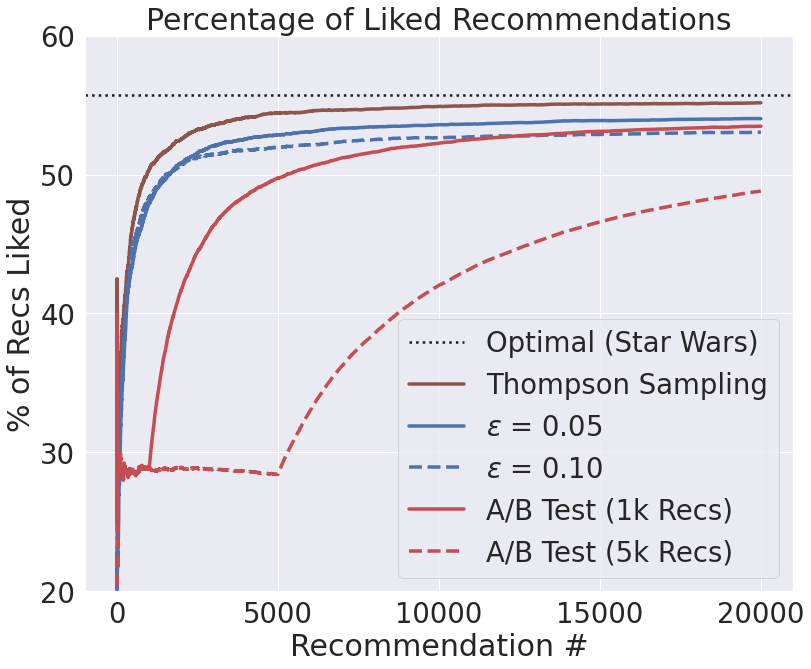

In [84]:
fig, ax = plt.subplots(figsize=(12,10))

# add a line for the optimal value -- 0.5575 for Star Wars (from exploration noteboook)
ax.axhline(y=0.5575, color='k', linestyle=':', linewidth=2.5)

for (avg_results_df, style) in [(thompson_avg, 'tab:brown'),
                                (eps_greedy_05_avg, 'b-'),
                                (eps_greedy_10_avg, 'b--'),
                                (ab_test_1k_avg, 'r-'),
                                (ab_test_5k_avg, 'r--')]:
    
    ax.plot(avg_results_df.visit, avg_results_df.fraction_relevant, style, linewidth=3.5)

ax.set_title('Percentage of Liked Recommendations')
ax.set_xlabel('Recommendation #')
ax.set_ylabel('% of Recs Liked')

ax.set_xticks(range(0,22000,5000))
ax.set_ylim(0.2, 0.6)
ax.set_yticks(np.arange(0.2, 0.7, 0.1))

# rescale the y-axis tick labels to show them as a percentage
ax.set_yticklabels((ax.get_yticks()*100).astype(int))

ax.legend(['Optimal (Star Wars)',
           'Thompson Sampling',
           '$\epsilon$ = 0.05',
           '$\epsilon$ = 0.10',
           'A/B Test (1k Recs)',
           'A/B Test (5k Recs)'
          ],
          loc='lower right'
         )
plt.tight_layout()
plt.show()